In [28]:
# First would be to install lightweight_mmm
# !pip install --upgrade lightweight_mmm --user


# -- Load older versions of the following libraries
# !pip install --upgrade numpyro==0.13.2 --user
# !pip install --upgrade jax==0.4.23 --user
# !pip install --upgrade jaxlib==0.4.23 --user

# !pip install --upgrade memory_profiler --user
# !pip install --upgrade worker --user
# !pip install --upgrade scipy==1.12.0 --user

# !pip install --upgrade prophet --user

In [29]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
aiohttp                      3.9.4
aiosignal                    1.3.1
alembic                      1.13.1
annotated-types              0.6.0
arviz                        0.18.0
asttokens                    2.4.1
astunparse                   1.6.3
async-timeout                4.0.3
attrs                        23.2.0
beautifulsoup4               4.12.3
bs4                          0.0.2
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
cloudpickle                  3.0.0
cmdstanpy                    1.2.2
colorama                     0.4.6
colorlog                     6.8.2
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
Cython                       3.0.10
dacite                       1.8.1
debugpy                      1.8.0
dec

In [30]:
from plotnine import *


# import plotly.io as pio

from prophet import Prophet

from functools import partial
import optuna as opt

In [31]:
"""
Import Lightweight MMM Libraries

"""

# Import jax.numpy and any other library we might need.
import jax.numpy as jnp
import numpyro

# Import the relevant modules of the library
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils


# importing the library
# from memory_profiler import profile
     

In [32]:
"""
Import required libraries

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.metrics import RocCurveDisplay,roc_curve,auc
from xgboost import XGBClassifier,XGBRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
import time
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification
import re

import shap
from pprint import pprint

# For ordinal encoding categorical variables, splitting data
from tqdm import tqdm

#Import 'scope' from hyperopt in order to obtain int values for certain hyperparameters.
from hyperopt.pyll.base import scope
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import warnings



from IPython.display import display, HTML
display(HTML("<st yle>.container { width:80% !important; }</style>"))

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

import warnings
warnings.filterwarnings('ignore')

In [33]:
# import numpy as np
# spend = np.random.rand(1000, 1).reshape(-1)
# noise = np.random.normal(size = 1000, scale = 0.2)
# #hill transformation
# alpha = 2
# gamma = 0.15
# spend_transformed = spend**alpha / (spend ** alpha + gamma ** alpha)
# response = 1 + 3 * spend_transformed  +  noise


# plt.hist(response)
# plt.show()
# plt.scatter(spend,response)
# plt.show()
# plt.scatter(spend_transformed,response)
# plt.show()


In [34]:
class data_pre_processing():
    """
    Pre process pandas dataframes
    """
    
    def df_description(df):
        print('shape : ',df.shape)
        print('dtypes :','\n',df.dtypes)
        return None

    def convert_col_names_to_lower_case(df):
        for col in df.columns:
            df = df.rename(columns = {col:col.lower()})
        return df
    
    def describe_data(df):
        display(df.describe(include='all'))
        return None
    
    def data_info(df):
        display(df.info(verbose=True, show_counts=True))
        return None

    def nulls_in_data(df):
        print(df.isnull().sum())
        return None
    
    def duplicate_rows_at_primary_key_level(df,level_of_the_data :list):
        
        df = df[df.duplicated(subset=level_of_the_data, keep=False)]
        if df.shape[0] >0:
            print(" Dataframe has duplicates, total rows with duplicates :",df.shape[0])
        else:
            print(" No duplicates in data")      
        return df
    
    def percentage_nulls_in_each_col(df):
        """
        Return a DF of total null percentage in each column
        Args:
            df (Dataframe): Input DF
        """
        NA = pd.DataFrame(data=[df.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (df.isna().sum()/df.shape[0]*100).tolist()],df.dtypes.tolist()], 
           columns=df.columns, index=['NA Count', 'NA Percent','Dtypes']).transpose()
        display(NA)
        
        return None

        
            
    def drop_cols(df,column_list_to_drop):
        """

        Args:
            df (Dataframe): Input Dataframe
            column_list_to_drop (List of Columns): List of columns to be dropped from DF
            
        Result :
            df with updated columns post dropping.
        """
        
        return df.drop(columns = column_list_to_drop)
    
    def df_columns_and_dtypes_into_list(df) -> dict:
        """

        Returns Dataframe columns and respcetive dtypes as a dictionary.
        Args:
            df (Dataframe): Input Dataframe

        Returns:
            dict: {col1:dtype,col2:dtype2}
        """
        
        return {df.columns.tolist()[i] : str(df.dtypes.tolist()[i]) for i in range(len(df.columns)) }
    
    
    def convert_dtypes_from_dict(df, col_to_dtype_mapping_dict : dict ):
        """
        df : Input Dataframe
        col_to_dtype_mapping_dict: {column:dtype}
        
        return : df with updated dtypes
        
        """
        print('Converting Column Datatypes')
        for col,dtype in col_to_dtype_mapping_dict.items():
            try:
                if col in df.columns:
                    if dtype == 'string':
                        df[col] = df[col].astype(str)
                    elif dtype == 'int':
                        df[col] = df[col].astype(int)
                    elif dtype == 'float':
                        df[col] = df[col].astype(float)
                    elif dtype == 'datetime':
                        df[col] = pd.to_datetime(df[col])
            except Exception as e:
                print('Error processing : ',col, ' ; ',e)
        return df
    


    def ydata_profiling(df):
        """
        Run ydata_profile library for data
        Args:
            df (Dataframe): Df to be profiled

        Returns:
            _type_: _description_
        """
        # !pip install ydata-profiling --ignore-installed llvmlite --user
        # from ydata_profiling import ProfileReport
        # or
        # !pip install ydata-profiling==4.1.2
        # !pip install pydantic==2.6.0 --user
        from ydata_profiling import ProfileReport
        profile = ProfileReport(df)
        
        return profile
    


    def process_nulls_in_df(df,null_columns)-> pd.core.frame.DataFrame:
        """_summary_

        Args:
            df (_type_): _description_
            null_columns (_type_): _description_

        Returns:
            pd.core.frame.DataFrame: _description_
        """
    

        
        return None
    
def plot_line_charts_with_lags(df, x_variable, y_variable='sales'):
    """
    Creates a 1x3 matrix of line charts with the specified x variable and sales over time,
    including charts with 1-week and 2-week lags for the x variable, all scaled based on Z-scores.

    Args:
    - df (DataFrame): The dataset containing the variables.
    - x_variable (str): The name of the x variable to plot against time.
    - y_variable (str): The name of the y variable, default is 'sales'.
    """

    # Ensuring the date column is in datetime format
    df['week_start_date'] = pd.to_datetime(df['week_start_date'])

    # Creating lagged variables
    df[f'{x_variable}_lag1'] = df[x_variable].shift(-1)
    df[f'{x_variable}_lag2'] = df[x_variable].shift(-2)

    # Scaling the variables based on Z-scores
    scaler = StandardScaler()
    scaled_vars = scaler.fit_transform(df[[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2']].dropna())
    df_scaled = pd.DataFrame(scaled_vars, columns=[y_variable, x_variable, f'{x_variable}_lag1', f'{x_variable}_lag2'])

    # Setting up the figure for plotting
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Because scaling and shifting may lead to a different number of rows, we need to align the date index.
    dates = df['week_start_date'][-len(df_scaled):]

    # Original variable line chart
    axes[0].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[0].plot(dates, df_scaled[x_variable], label=x_variable, color='red')
    axes[0].set_title(f'Original {y_variable} and {x_variable} (Scaled)')
    axes[0].legend(loc='upper left')

    # 1-week lag line chart
    axes[1].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[1].plot(dates, df_scaled[f'{x_variable}_lag1'], label=f'{x_variable} (1-week lag)', color='red')
    axes[1].set_title(f'{y_variable} and 1-week Lag of {x_variable} (Scaled)')
    axes[1].legend(loc='upper left')

    # 2-week lag line chart
    axes[2].plot(dates, df_scaled[y_variable], label=y_variable, color='blue')
    axes[2].plot(dates, df_scaled[f'{x_variable}_lag2'], label=f'{x_variable} (2-week lag)', color='red')
    axes[2].set_title(f'{y_variable} and 2-week Lag of {x_variable} (Scaled)')
    axes[2].legend(loc='upper left')

    
    for ax in axes:
        ax.set_xlabel('Date')
        ax.set_ylabel('Scaled Value')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [35]:
# importing libraries
import os
import psutil
 
# inner psutil function
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss
 
# decorator function
def profile(func):
    def wrapper(*args, **kwargs):
 
        mem_before = process_memory()
        result = func(*args, **kwargs)
        mem_after = process_memory()
        print("{}:consumed memory: {:,}".format(
            func.__name__,
            mem_before, mem_after, mem_after - mem_before))
 
        return result
    return wrapper
 
# instantiation of decorator function
@profile

def load_dataset():
    mmm_df = pd.read_csv('MMM_Data.csv')
    
    print(mmm_df.shape)
    return mmm_df

mmm_df = load_dataset()



(209, 80)
load_dataset:consumed memory: 1,081,417,728


In [36]:
"""
Read the dataset.

Four years' (209 weeks) records of sales, media impression and media spending at weekly level.

1. Media Variables

Media Impression (prefix='mdip_'): impressions of 13 media channels: direct mail, insert, newspaper, digital audio, radio, TV, digital video, social media, online display, email, SMS, affiliates, SEM.
Media Spending (prefix='mdsp_'): spending of media channels.
2. Control Variables

Macro Economy (prefix='me_'): CPI, gas price.
Markdown (prefix='mrkdn_'): markdown/discount.
Store Count ('st_ct')
Retail Holidays (prefix='hldy_'): one-hot encoded.
Seasonality (prefix='seas_'): month, with Nov and Dec further broken into to weeks. One-hot encoded.
3. Sales Variable ('sales')

"""
    



mmm_df = pd.read_csv('MMM_Data.csv')
print(mmm_df.shape)



(209, 80)


In [37]:
"""
Define new names for columns.
Re-map column names.

"""

mmm_df2 = mmm_df.copy()

mapped_columns_dict = {'mdip_':'media_impression_',\
                        'mdsp_':'media_spend_',\
                        'me_': 'macro_econ_',\
                        'mrkdn_':'markdown_discount_',\
                        'st_ct':'store_count',\
                        'wk_strt_dt':'week_start_date',\
                        'wk_in_yr_nbr':'week_in_year',\
                        'yr_nbr':'year',\
                        'qtr_nbr':'quarter',\
                        'prd':'period',\
                        'wk_nbr':'week_in_month',\
                        '_dm':'_direct_mail',\
                        '_inst':'_insert',\
                        '_nsp':'_newspaper',\
                        '_auddig':'_dig_audio',\
                        '_audtr':'_radio',\
                        '_vidtr':'_tv',\
                        '_viddig':'_dig_video',\
                        '_so':'_social_media',\
                        '_on':'_online display',\
                        '_em':'_email',\
                        '_sms':'_sms',\
                        }

datatype_mapping = {'week_start_date':'datetime'}

# Map column names
for short_form,long_form in mapped_columns_dict.items():
    for col in mmm_df2.columns:
        if short_form in col:
            new_col_name = re.sub(short_form,long_form,col)
            # print(short_form,"--> ",col,"--> ",new_col_name)
            mmm_df2 = mmm_df2.rename(columns={col:new_col_name})


# Lowercase column names
mmm_df2 = data_pre_processing.convert_col_names_to_lower_case(mmm_df2)

# String to Date conversion
mmm_df2 = data_pre_processing.convert_dtypes_from_dict(df = mmm_df2,col_to_dtype_mapping_dict=datatype_mapping)





Converting Column Datatypes


In [38]:
"""
Define continuous,categorical and target column

"""


continuous_column = [ 'media_impression_direct_mail', 'media_impression_insert',
       'media_impression_newspaper', 'media_impression_dig_audio',
       'media_impression_radio', 'media_impression_tv',
       'media_impression_dig_video', 'media_impression_social_media',
       'media_impression_online display', 'media_impression_email',
       'media_impression_sms', 'media_impression_aff', 'media_impression_sem',
       'media_spend_direct_mail', 'media_spend_insert',
       'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio',
       'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media',
       'media_spend_online display', 'media_spend_sem',
       'macro_econ_ics_all', 'macro_econ_gas_dpg', 'store_count',
       'markdown_discount_valadd_edw', 'markdown_discount_pdm']

one_hot_encoded_columns = ["hldy_black friday",
       "hldy_christmas day", "hldy_christmas eve", "hldy_columbus day",
       "hldy_cyber monday", "hldy_day after christmas", "hldy_easter",
       "hldy_father's day", "hldy_green monday", "hldy_july 4th",
       "hldy_labor day", "hldy_mlk", "hldy_memorial day", "hldy_mother's day",
       "hldy_nye", "hldy_new year's day", "hldy_pre thanksgiving",
       "hldy_presidents day", "hldy_prime day", "hldy_thanksgiving",
       "hldy_valentine's day", "hldy_veterans day",
       #  "seas_period_1",
       # "seas_period_2", "seas_period_3", "seas_period_4", "seas_period_5",
       # "seas_period_6", "seas_period_7", "seas_period_8", "seas_period_9",
       # "seas_period_12", "seas_week_40", "seas_week_41", "seas_week_42",
       # "seas_week_43", "seas_week_44", "seas_week_45", "seas_week_46",
       # "seas_week_47", "seas_week_48"
       ]

date_columns = ['week_start_date', 'year', 'quarter', 'period', 'week_in_month','week_in_year']

target_column = ["sales"]

""""

Lightweight mmm columns

"""

media_spend_cols = [ 'media_spend_direct_mail', 'media_spend_insert',
       'media_spend_newspaper', 'media_spend_dig_audio', 'media_spend_radio',
       'media_spend_tv', 'media_spend_dig_video', 'media_spend_social_media',
       'media_spend_online display', 'media_spend_sem']


media_impression_cols = [ 'media_impression_direct_mail', 'media_impression_insert',
       'media_impression_newspaper', 'media_impression_dig_audio',
       'media_impression_radio', 'media_impression_tv',
       'media_impression_dig_video', 'media_impression_social_media',
       'media_impression_online display', 'media_impression_sem']


extra_features_cols = ['macro_econ_ics_all', 'macro_econ_gas_dpg', 'store_count',
       'markdown_discount_valadd_edw', 'markdown_discount_pdm']+one_hot_encoded_columns

In [39]:
"""
Train test split

"""


"""

Time-series Split -->

"""
tss = TimeSeriesSplit(n_splits = 4)

mmm_df2_time_series = mmm_df2.copy()
mmm_df2_time_series.set_index('week_start_date', inplace=True)
mmm_df2_time_series.sort_index(inplace=True)

independant_columns = [i for i in continuous_column+one_hot_encoded_columns+date_columns if 'week_start_date' not in i]
X = mmm_df2_time_series[independant_columns]
y = mmm_df2_time_series[target_column]

# Add 0.01 to each numerical value for lightweight mmm
for col in X.columns:
    if col in continuous_column:
        X[col] = X[col] + 0.1

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


print(X_train.shape,X_test.shape)




"""

Regular Split -->

"""

# independant_columns = [i for i in continuous_column+one_hot_encoded_columns+date_columns if 'week_start_date' not in i ]
# X = mmm_df2[independant_columns]
# y = mmm_df2[target_column]

# # Using the train test split function
# X_train, X_test, y_train, y_test = train_test_split(
#   X,y , random_state=104,test_size=0.25, shuffle=True)

# print(X_train.shape,X_test.shape)

(168, 55) (41, 55)


'\n\nRegular Split -->\n\n'

In [40]:
# mmm_df2.shape

# """

# Run XGB Regressor

# """


# # Define Hyperparameters
# param_tuning = {
#         'learning_rate': [0.01, 0.1],
#         'max_depth': [3, 5, 7, 10],
#         'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7],
#         'colsample_bytree': [0.5, 0.7],
#         'n_estimators' : [100, 200, 500],
#         # 'objective': ['reg:squarederror']
#     }

# #Define Model
# xgb_model = XGBRegressor()


# # Define KFold  and RandoSearch CV
# cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# random_search_le = RandomizedSearchCV(estimator=xgb_model,
#                                     param_distributions=param_tuning,
#                                     cv=cv,
#                                     n_jobs=-2,
#                                     verbose = 2,
#                                     )

# random_search_le.fit(X_train,y_train)

# print(random_search_le.best_params_)

# # Run new model for best params
# new_model = XGBRegressor(random_state=6,**random_search_le.best_params_)

# new_model.fit(X_train,y_train)

# #predict on new model
# prediction = new_model.predict(X_test)


# # Calculate accuracy
# print("MAPE", mean_absolute_percentage_error(y_test,prediction)*100, '\n R2:', r2_score(y_test,prediction))


In [41]:
# """

# Hyper-opt for XGB Regressor

# """

# #Define the hyperopt objective.
# def hyperparameter_tuning(space):
#     model = XGBRegressor(**space)
    
#     #Define evaluation datasets.
#     evaluation = [(X_train, y_train), (X_test, y_test)]
    
#     #Fit the model. Define evaluation sets, early_stopping_rounds, and eval_metric.
#     model.fit(X_train, y_train,
#             eval_set=evaluation, eval_metric="rmse",
#             early_stopping_rounds=100,verbose=False)

#     #Obtain prediction and rmse score.
#     pred = model.predict(X_test)
#     rmse = mean_squared_error(y_test, pred, squared=False)
#     # print ("SCORE:", rmse)
    
#     #Specify what the loss is for each model.
#     return {'loss':rmse, 'status': STATUS_OK, 'model': model}


# #Define the space over which hyperopt will search for optimal hyperparameters.
# space = {'max_depth': scope.int(hp.quniform("max_depth", 1, 5, 1)),
#         'gamma': hp.uniform ('gamma', 0,1),
#         'reg_alpha' : hp.uniform('reg_alpha', 0,50),
#         'reg_lambda' : hp.uniform('reg_lambda', 10,100),
#         'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
#         'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
#         'n_estimators': 10000,
#         'learning_rate': hp.uniform('learning_rate', 0, .15),
#         'tree_method':'hist', 
#         'random_state': 5,
#         'max_bin' : scope.int(hp.quniform('max_bin', 200, 550, 1))}

# #Run 20 trials.
# trials = Trials()
# best = fmin(fn=hyperparameter_tuning,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=30,
#             trials=trials)

# # print(best)

# #Create instace of best model.
# best_model = trials.results[np.argmin([r['loss'] for r in 
#     trials.results])]['model']

# #Examine model hyperparameters
# print(best_model)

# #predict on new model
# prediction = best_model.predict(X_test)


# # Calculate accuracy
# print("MAPE", mean_absolute_percentage_error(y_test,prediction)*100, '\n R2:', r2_score(y_test,prediction))


In [42]:
"""
Lightweight mmm implementation

"""


media_impression_train =  X_train[media_impression_cols].to_numpy()

media_impression_test = X_test[media_impression_cols].to_numpy()

target_train = y_train[target_column].sum(axis = 1).to_numpy()

target_test = y_test[target_column].sum(axis = 1).to_numpy()

media_spend_train =  X_train[media_spend_cols].to_numpy()

media_spend_test = X_test[media_spend_cols].to_numpy()

extra_train =  X_train[extra_features_cols].to_numpy()

extra_test = X_test[extra_features_cols].to_numpy()



#
costs = X_train[media_spend_cols].sum().to_numpy()

print(costs)
"""

Scaling

"""



media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
extra_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
costs_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)


#CHANGE THIS-
media_spend_train_scaled = media_scaler.fit_transform(media_spend_train)


extra_train_scaled = extra_scaler.fit_transform(extra_train)
target_train_scaled = target_scaler.fit_transform(target_train)
media_spend_scaled = costs_scaler.fit_transform(costs)


# Test data
extra_test_scaled = extra_scaler.transform(extra_test)
media_spend_test_scaled = media_scaler.fit_transform(media_spend_test)

target_test_scaled =  target_scaler.fit_transform(target_test)


for i in [media_spend_train_scaled,extra_train_scaled,target_train_scaled,media_spend_scaled]:
    print(type(i),i.shape)

print(media_spend_train_scaled.shape[1],  len(media_spend_scaled))

[1.36815515e+08 1.45348523e+07 5.21870478e+07 5.95605020e+05
 2.03373528e+07 2.92054690e+07 2.98892345e+06 1.37373578e+07
 3.35265371e+07 9.87879146e+07]
<class 'jaxlib.xla_extension.ArrayImpl'> (168, 10)
<class 'jaxlib.xla_extension.ArrayImpl'> (168, 27)
<class 'jaxlib.xla_extension.ArrayImpl'> (168,)
<class 'jaxlib.xla_extension.ArrayImpl'> (10,)
10 10


In [43]:
media_spend_test_scaled.shape

(41, 10)

In [44]:
# data_size = 104 + 13
# n_media_channels = 3
# n_extra_features = 1
# media_data, extra_features, target, costs = utils.simulate_dummy_data(
#     data_size=data_size,
#     n_media_channels=n_media_channels,
#     n_extra_features=n_extra_features)

# # Split and scale data.
# split_point = data_size - 13
# # Media data
# media_data_train = media_data[:split_point, ...]
# media_data_test = media_data[split_point:, ...]
# # Extra features
# extra_features_train = extra_features[:split_point, ...]
# extra_features_test = extra_features[split_point:, ...]
# # Target
# target_train = target[:split_point]  


# print(media_data_train.shape[1],  len(costs))

# media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# extra_features_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean, multiply_by=0.15)

# media_data_train = media_scaler.fit_transform(media_data_train)
# extra_features_train = extra_features_scaler.fit_transform(extra_features_train)
# target_train = target_scaler.fit_transform(target_train)
# costs = cost_scaler.fit_transform(costs)

# mmm = lightweight_mmm.LightweightMMM(model_name="carryover")


# for i in [media_data_train,extra_features_train,target_train,costs]:
#     print(type(i),i.shape)

# print(media_data_train.shape[1],  len(costs))

# # -> Imoressions columns = spends length

# # number_warmup=1000
# # number_samples=1000
# # mmm.fit(
# #     media=media_data_train,
# #     media_prior=costs,
# #     target=target_train,
# #     extra_features=extra_features_train,
# #     number_warmup=number_warmup,
# #     number_samples=number_samples,
# #     seed=1)

In [45]:
target_train

array([7.20514576e+07, 7.87947705e+07, 7.00711856e+07, 6.86424646e+07,
       8.61907847e+07, 5.61206164e+07, 1.25634433e+08, 1.10756936e+08,
       1.16192535e+08, 1.29263590e+08, 1.42052816e+08, 7.17540438e+07,
       1.23589120e+08, 7.75875339e+07, 1.53818240e+08, 1.88168749e+08,
       1.52932619e+08, 3.07377804e+08, 1.64024324e+08, 3.51597977e+08,
       3.23162004e+08, 1.06476774e+08, 1.06622601e+08, 6.34607874e+07,
       5.35035583e+07, 9.85468295e+07, 6.67747051e+07, 8.36661340e+07,
       7.30903785e+07, 1.11100800e+08, 6.47450530e+07, 7.07741382e+07,
       1.30727969e+08, 7.16337108e+07, 8.89227392e+07, 6.57779340e+07,
       7.50164974e+07, 9.64383560e+07, 1.90030036e+08, 1.06526801e+08,
       7.20851096e+07, 7.44219030e+07, 1.32061381e+08, 7.76905961e+07,
       1.19823112e+08, 9.66654862e+07, 6.32965036e+07, 1.22461146e+08,
       6.96123547e+07, 6.17227566e+07, 6.05849345e+07, 9.62758403e+07,
       1.19468401e+08, 1.34756598e+08, 6.00625155e+07, 1.15402405e+08,
      

In [52]:
"""
Test for best ad-stock model

Error1: ValueError: The number of data channels provided must match the number of cost values.

"""

%time

adstock_models = ["adstock", "hill_adstock", "carryover"]
degrees_season = [1,2,3]

adstock_models = [ "adstock"]
degrees_season = [2]


# try:
for model_name in adstock_models:
    for degrees in degrees_season:
        mmm = lightweight_mmm.LightweightMMM(model_name=model_name)
        mmm.fit(media=media_spend_train_scaled,
                media_prior=media_spend_scaled,
                target=target_train_scaled,
                extra_features=extra_train_scaled,
                number_warmup=100,
                number_samples=100,
                number_chains=2,
                degrees_seasonality=degrees,
                weekday_seasonality=False,
                seasonality_frequency=52,
                seed=1)
        
        print(f"CPU utilization: {psutil.cpu_percent()}%") 
        print(f"Memory utilization: {psutil.virtual_memory().percent}%") 
        
        mmm.print_summary()
        prediction = mmm.predict(
        media=media_spend_test_scaled,
        extra_features=extra_test_scaled,
        target_scaler=target_scaler)
        print("prediction.shape",prediction.shape)
        p = prediction.mean(axis=0)

        mape = mean_absolute_percentage_error(target_test, p)
        # r2 = r2_score(target_test, p)
        print(f"model_name={model_name} degrees={degrees} MAPE={mape} samples={p[:3]}")

            
# except Exception as e:
#     print(e)
    


CPU times: total: 0 ns
Wall time: 0 ns


sample: 100%|██████████| 200/200 [00:25<00:00,  7.76it/s, 1023 steps of size 2.26e-03. acc. prob=0.97]


CPU utilization: 4.5%
Memory utilization: 85.3%

                             mean       std    median      5.0%     95.0%     n_eff     r_hat
 coef_extra_features[0]     -0.66      0.64     -0.61     -1.67      0.28     81.52      1.00
 coef_extra_features[1]      0.20      0.32      0.17     -0.34      0.76     92.51      1.00
 coef_extra_features[2]     -0.61      0.71     -0.59     -1.86      0.53     25.33      1.04
 coef_extra_features[3]     -0.04      0.20     -0.02     -0.48      0.19     62.90      1.01
 coef_extra_features[4]      0.51      0.66      0.46     -0.66      1.54     83.39      1.02
 coef_extra_features[5]      0.14      0.86      0.12     -1.04      1.53     35.53      1.04
 coef_extra_features[6]      0.15      0.77      0.17     -1.08      1.43     14.23      1.16
 coef_extra_features[7]      0.01      0.01      0.01     -0.00      0.01    112.68      1.00
 coef_extra_features[8]     -0.00      0.00     -0.00     -0.01      0.01    233.87      1.01
 coef_extra

In [53]:
{'channel_'+str(i):media_spend_cols[i] for i in range(len(media_spend_cols))}

{'channel_0': 'media_spend_direct_mail',
 'channel_1': 'media_spend_insert',
 'channel_2': 'media_spend_newspaper',
 'channel_3': 'media_spend_dig_audio',
 'channel_4': 'media_spend_radio',
 'channel_5': 'media_spend_tv',
 'channel_6': 'media_spend_dig_video',
 'channel_7': 'media_spend_social_media',
 'channel_8': 'media_spend_online display',
 'channel_9': 'media_spend_sem'}

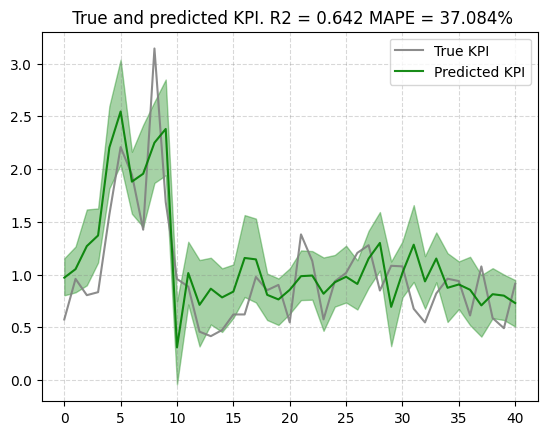

In [51]:
new_predictions = mmm.predict(media=media_spend_test_scaled,
                              extra_features=extra_test_scaled,
                            #   target_scaler=target_scaler,
                              seed=1)

plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_test))

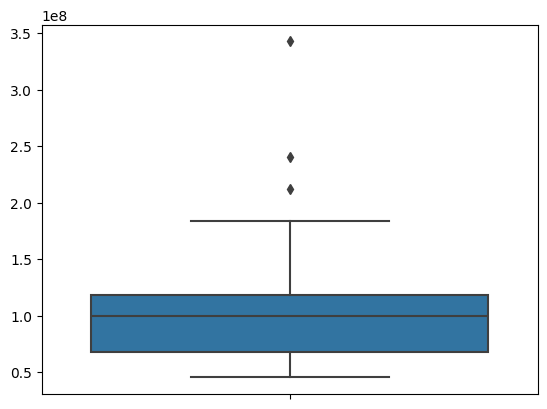

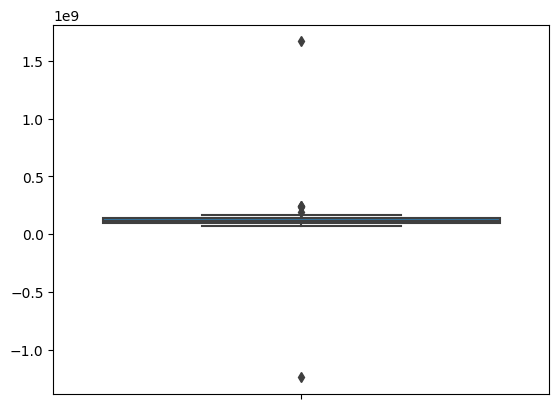

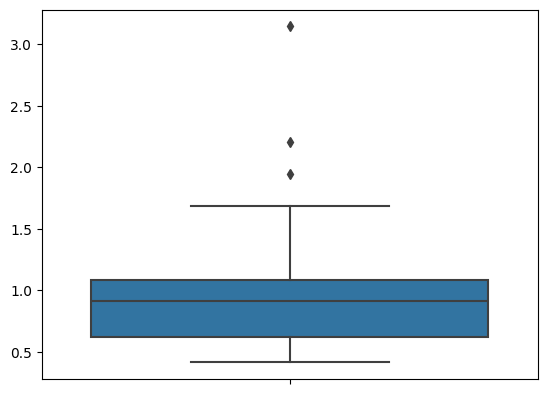

In [80]:
sns.boxplot(y = target_test)
plt.show()

sns.boxplot(y = p)
plt.show()

sns.boxplot(y = target_test_scaled)
plt.show()

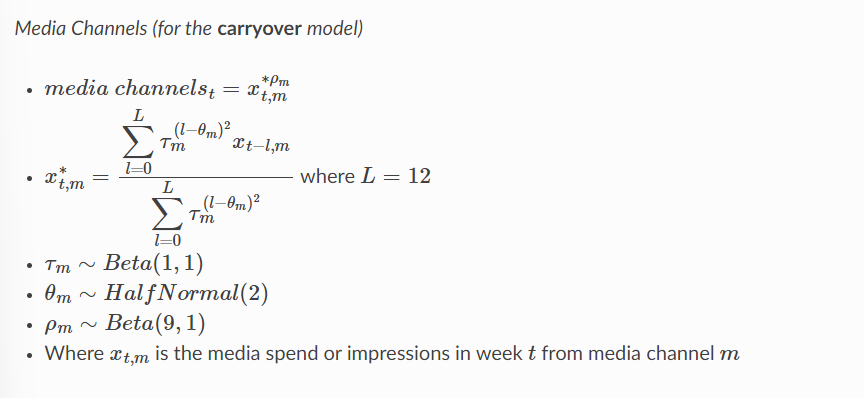
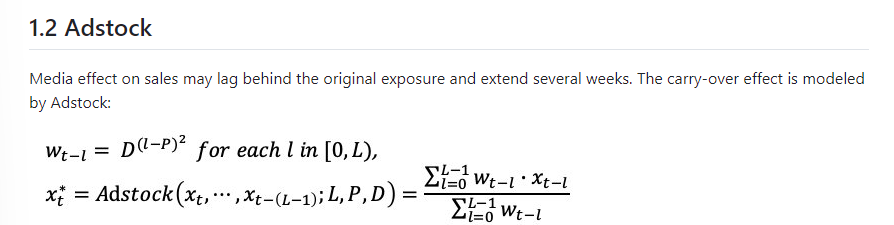


In [47]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_true))

def median_ape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.median(np.abs((y_pred - y_true) / y_true))

print(mape(target_test,p))

print(median_ape(target_test, p))

print(r2_score(target_test, p))

0.35967243633376994
0.3276750019652421
0.44525646140489517


<Axes: >

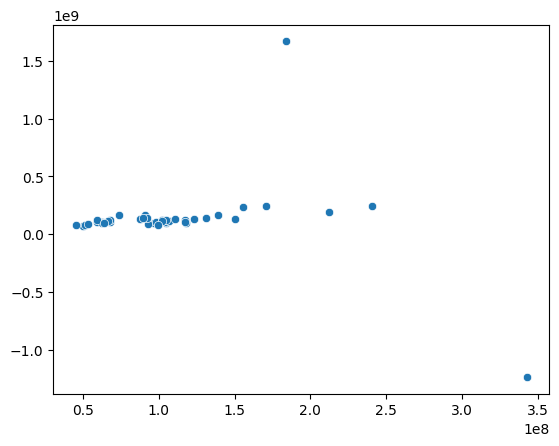

In [33]:
sns.scatterplot(x=target_test, y=p)

In [34]:
import numpy as np
import pandas as pd


def apply_adstock(x, L, P, D):
    '''
    params:
    x: original media variable, array
    L: length
    P: peak, delay in effect
    D: decay, retain rate
    returns:
    array, adstocked media variable
    '''
    x = np.append(np.zeros(L-1), x)
    
    weights = np.zeros(L)
    for l in range(L):
        weight = D**((l-P)**2)
        weights[L-1-l] = weight
    
    adstocked_x = []
    for i in range(L-1, len(x)):
        x_array = x[i-L+1:i+1]
        xi = sum(x_array * weights)/sum(weights)
        adstocked_x.append(xi)
    adstocked_x = np.array(adstocked_x)
    return adstocked_x



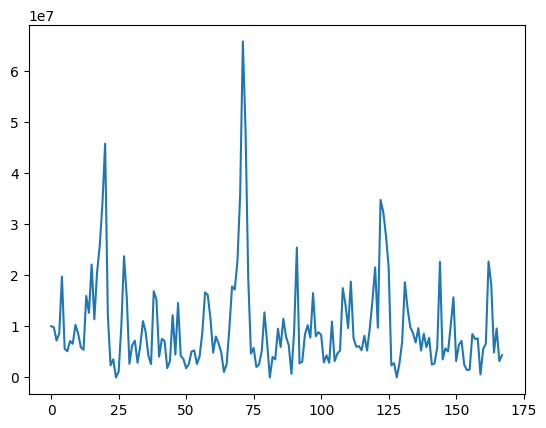

In [35]:
x_plot = X_train['media_impression_tv'].values
plt.plot(x_plot)

In [36]:
# mmm._mcmc.print_summary().toDF()

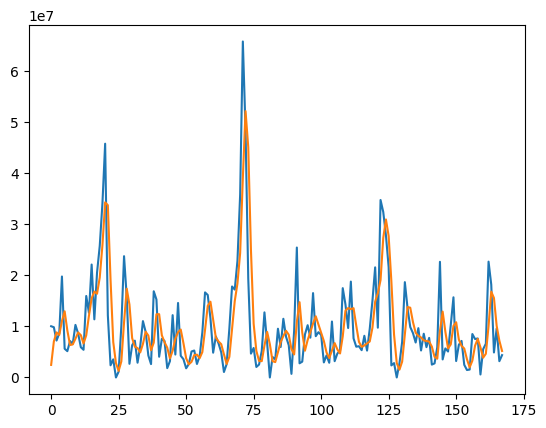

In [37]:
L = 12
D = 0.54
P = 1.01 

x = x_plot
carryover_tv = apply_adstock(x, L, P, D)


plt.plot(x_plot)
plt.plot(carryover_tv)
plt.show()

In [38]:
carryover_tv



    

array([ 2466000.12578872,  7042431.50501261,  8840319.16256482,
        8333378.71497071, 11068271.08369509, 12975552.73378457,
        9200106.22895651,  6355813.34194146,  6471666.2035535 ,
        7587659.82088521,  8815932.12209937,  8287978.9572637 ,
        6651837.27764172,  8275441.08758603, 12084874.30516271,
       15520058.93528227, 16830438.43649706, 16405877.45186136,
       19583268.1967165 , 25936874.97370892, 34310960.46906208,
       33753801.90467677, 19146782.21317629,  6940374.80785158,
        2810430.3766938 ,  1295615.99323717,  3155153.02934649,
       10780461.14218797, 17391737.70579346, 14286609.57827607,
        7713626.2005991 ,  6028250.93176433,  5760112.35152146,
        4920198.7631576 ,  6578408.95749874,  8962313.65795157,
        8206669.51249003,  5330407.08294979,  6819066.5378674 ,
       12381838.93148506, 12400034.50225196,  8257671.20533576,
        6906418.45563087,  5838737.39713397,  3741724.69523159,
        5236525.30630483,  7621303.44620

In [39]:
"""

Train dataset MAPE

"""

new_predictions = mmm.predict(media=media_spend_train_scaled,
                              extra_features=extra_train_scaled,
                              target_scaler=target_scaler,
                              seed=1)

new_predictions = np.median(new_predictions,axis=0)
# new_predictions
new_predictions.shape

mean_absolute_percentage_error(target_train, new_predictions)

0.46477952801505107

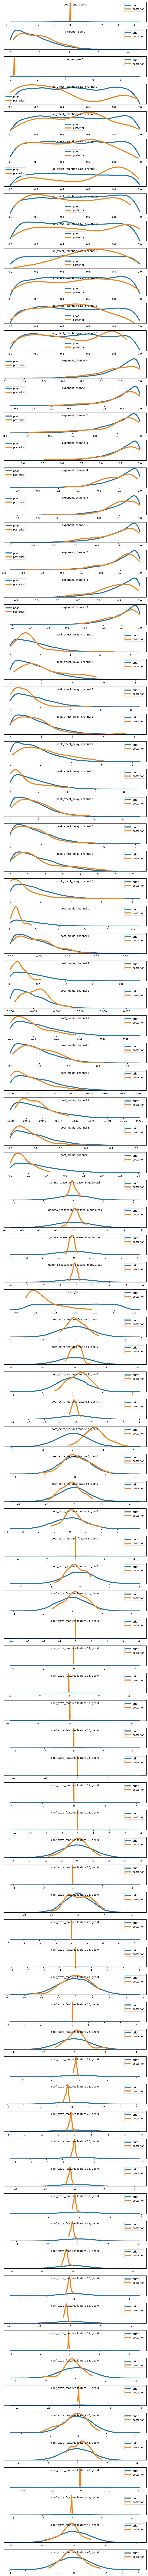

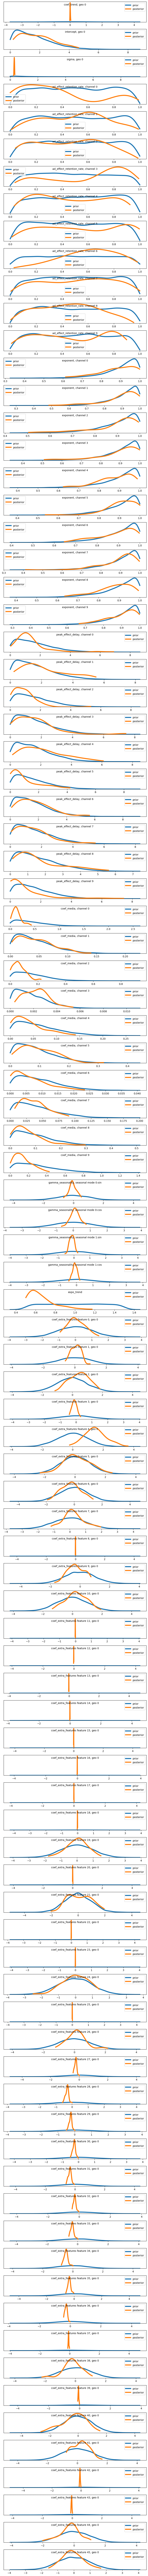

In [40]:
plot.plot_prior_and_posterior(media_mix_model=mmm)

In [41]:


# plot.plot_media_channel_posteriors(media_mix_model=mmm,channel_names=media_spend_cols)

In [42]:
# print(len(new_predictions),len(new_predictions[0]))
# target_test
# target_train
type(new_predictions)

numpy.ndarray

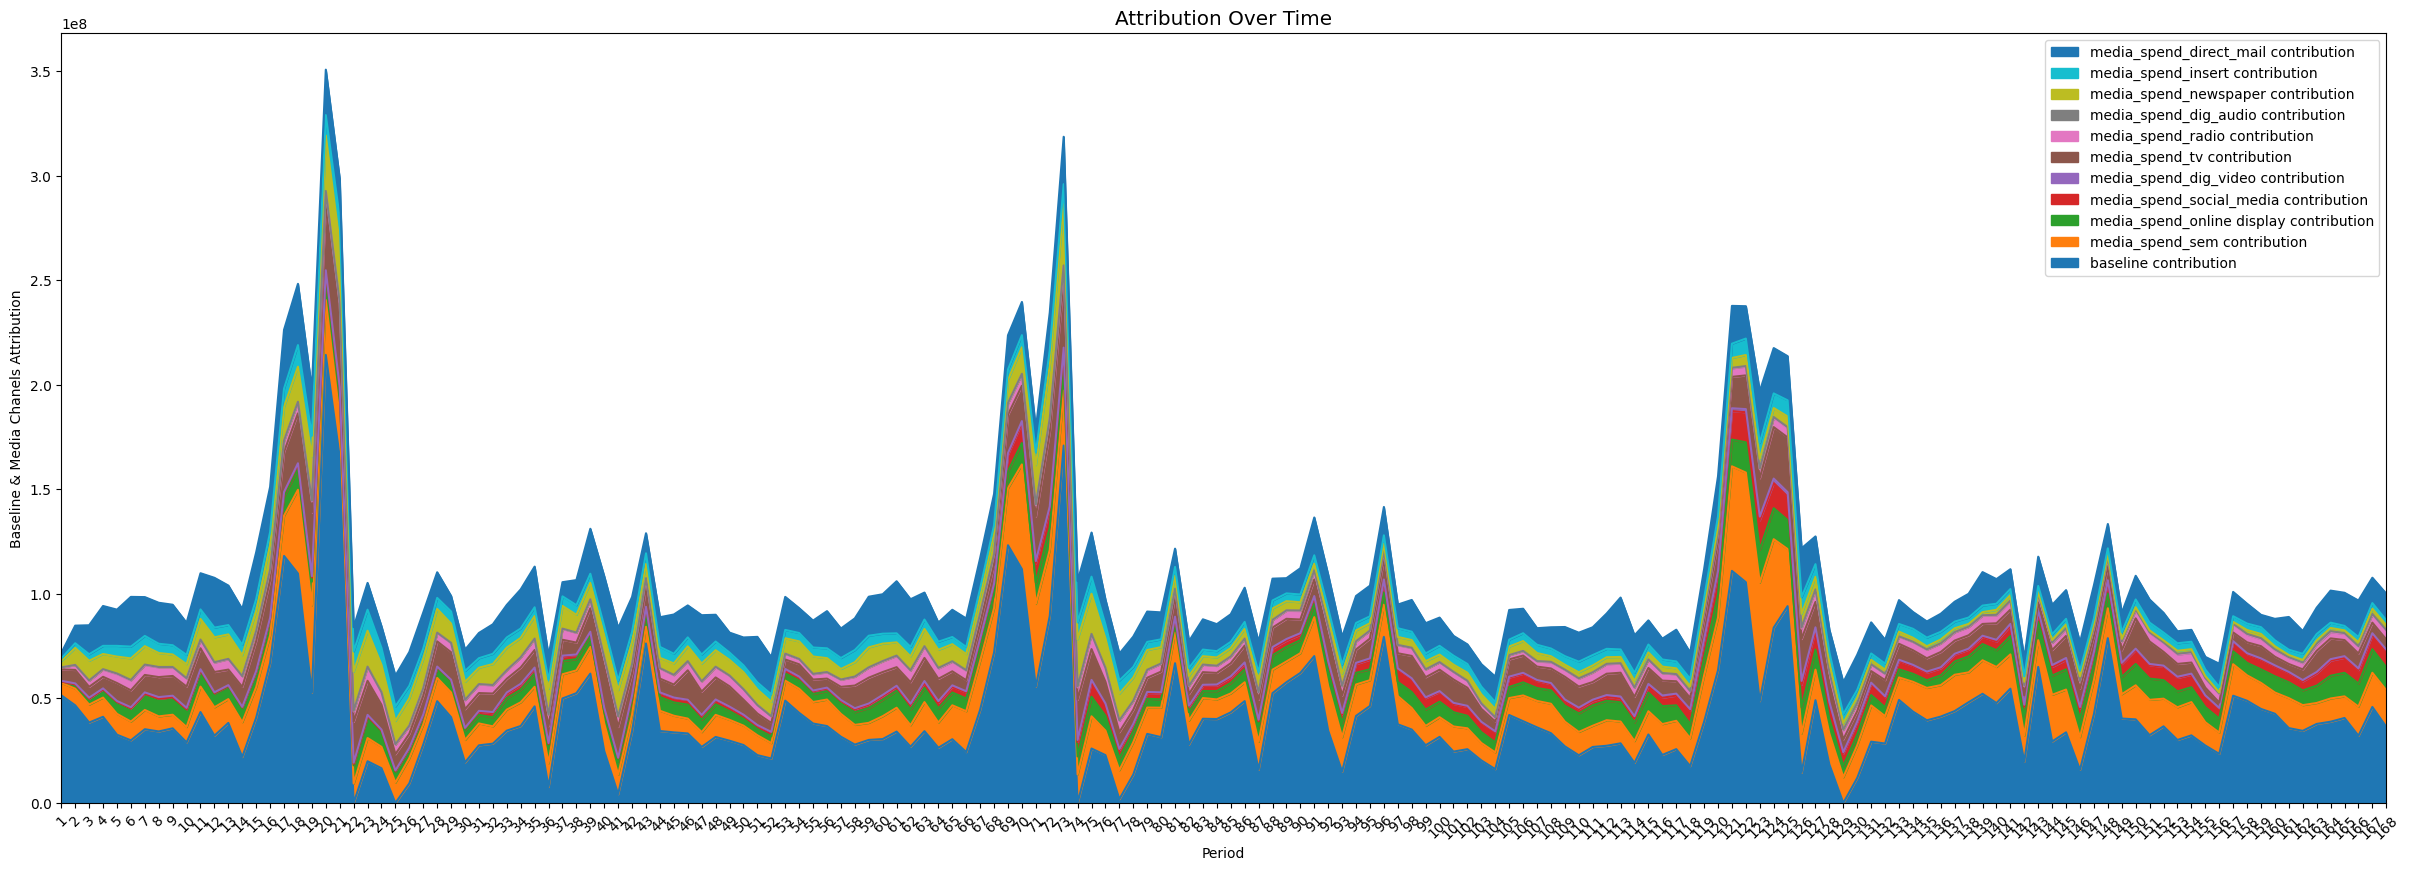

In [43]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=costs_scaler)
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = media_spend_cols
                                                )

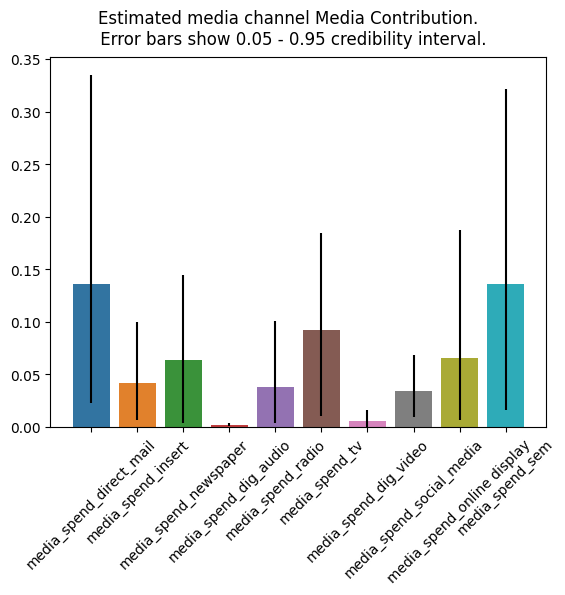

<Figure size 2000x2000 with 0 Axes>

In [44]:
plt.figure(figsize=(20,20))
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution", channel_names=media_spend_cols,interval_mid_range= 0.9)

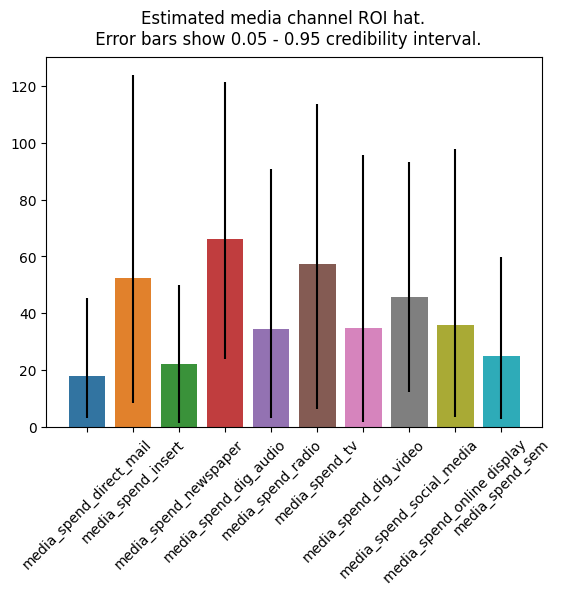

<Figure size 2000x2000 with 0 Axes>

In [45]:
plt.figure(figsize=(20,20))
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat", channel_names=media_spend_cols,interval_mid_range= 0.9)

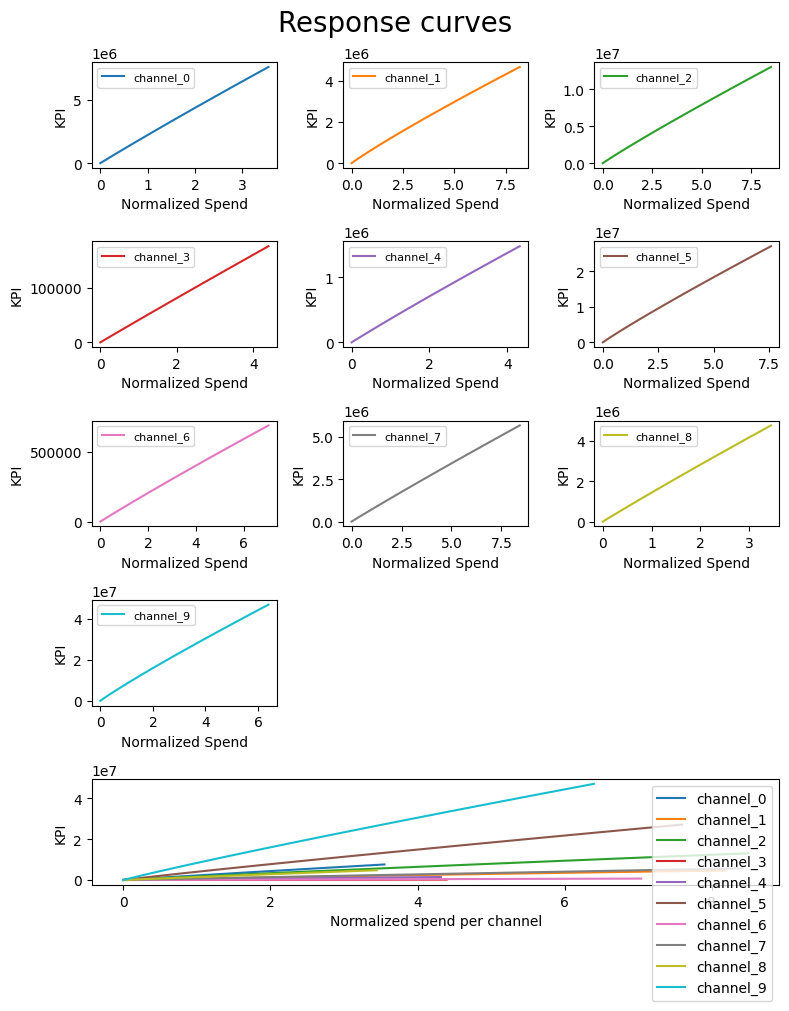

In [47]:
plot.plot_response_curves(media_mix_model=mmm, target_scaler=target_scaler,seed = 1)

In [48]:
{'channel_'+str(i):media_spend_cols[i] for i in range(len(media_spend_cols))}

{'channel_0': 'media_spend_direct_mail',
 'channel_1': 'media_spend_insert',
 'channel_2': 'media_spend_newspaper',
 'channel_3': 'media_spend_dig_audio',
 'channel_4': 'media_spend_radio',
 'channel_5': 'media_spend_tv',
 'channel_6': 'media_spend_dig_video',
 'channel_7': 'media_spend_social_media',
 'channel_8': 'media_spend_online display',
 'channel_9': 'media_spend_sem'}

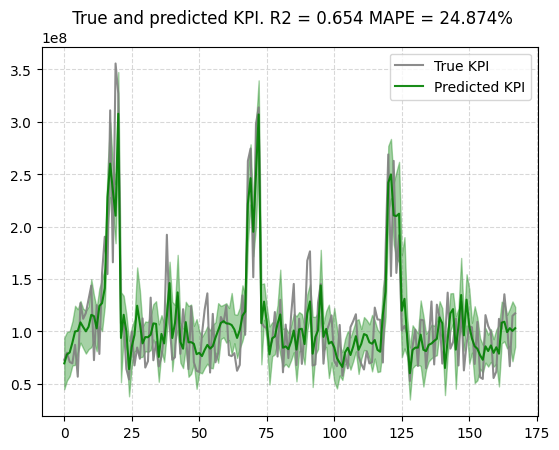

In [49]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [50]:
n_media_channels = 10
prices = jnp.ones(mmm.n_media_channels)
n_time_periods = 5
media_data = X[media_spend_cols].to_numpy()

budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [51]:
# Run optimization with the parameters of choice.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    extra_features= extra_scaler.transform(X[extra_features_cols].to_numpy())[:n_time_periods],
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -797087100.5297608
            Iterations: 64
            Function evaluations: 1333
            Gradient evaluations: 63


In [52]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([3154810.5 ,  303719.06,  148770.67,   30421.59,  515842.38,
        869225.  ,  128304.21,  739791.9 , 1464265.2 , 4389447.5 ],      dtype=float32)

In [53]:

# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([2870371.   ,  276335.56 ,  135357.42 ,   27678.764,  704000.7  ,
        790855.2  ,  116736.22 , 1009637.9  , 1543051.2  , 4270574.5  ],      dtype=float32)

In [54]:

# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(11744598., dtype=float32), Array(11744598., dtype=float32))

In [55]:

# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(11744598., dtype=float32), Array(11744598., dtype=float32))

In [56]:
{'channel_'+str(i):media_spend_cols[i] for i in range(len(media_spend_cols))}

{'channel_0': 'media_spend_direct_mail',
 'channel_1': 'media_spend_insert',
 'channel_2': 'media_spend_newspaper',
 'channel_3': 'media_spend_dig_audio',
 'channel_4': 'media_spend_radio',
 'channel_5': 'media_spend_tv',
 'channel_6': 'media_spend_dig_video',
 'channel_7': 'media_spend_social_media',
 'channel_8': 'media_spend_online display',
 'channel_9': 'media_spend_sem'}

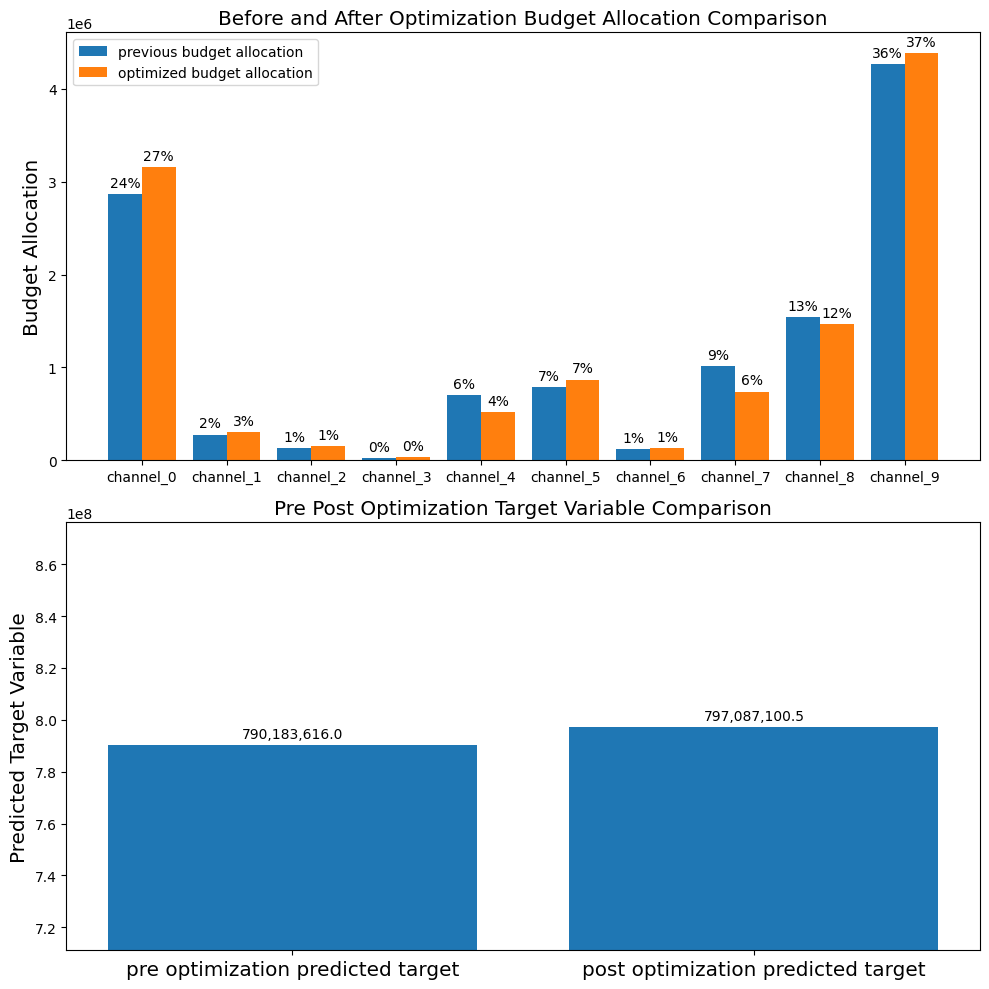

In [57]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10))

In [58]:
# file_path = "mmm_carryover_2_12_apr.pkl"
# utils.save_model(media_mix_model=mmm, file_path=file_path)